Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as pp

READING THE CSV FILE

In [2]:
data_df = pd.read_csv('data.csv')


In [3]:
data_df.head()

,name,latitude,longitude,car_name,car_number,number_of_seats,in_carpool
0,Aarav,28.7041,77.1025,Maruti Suzuki Swift DZire,VAA123,4.0,True
1,Aditi,28.7042,77.1026,Honda City,VAB234,4.0,True
2,Aryan,22.5726,88.3639,Tata Tiago,VAC345,4.0,False
3,Deepika,22.5727,88.3640,Mahindra Scorpio,VAD456,5.0,True
4,Gautam,17.3850,78.4867,Renault Kwid,VAE567,4.0,False


DATASET INFO

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             249 non-null    object 
 1   latitude         224 non-null    float64
 2   longitude        248 non-null    float64
 3   car_name         226 non-null    object 
 4   car_number       229 non-null    object 
 5   number_of_seats  226 non-null    float64
 6   in_carpool       249 non-null    bool   
dtypes: bool(1), float64(3), object(3)
memory usage: 12.0+ KB


CHECKING THE NULL VALUES

In [5]:
data_df.isnull().sum()


name                0
latitude           25
longitude           1
car_name           23
car_number         20
number_of_seats    23
in_carpool          0
dtype: int64

DROPPING THE Rows with null values

In [6]:
data_df = data_df.drop_duplicates()
data_df =data_df.dropna(subset=['latitude']) # Drop rows with missing values
data_df =data_df.dropna(subset=['longitude']) # Drop rows with missing values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             207 non-null    object 
 1   latitude         207 non-null    float64
 2   longitude        207 non-null    float64
 3   car_name         187 non-null    object 
 4   car_number       205 non-null    object 
 5   number_of_seats  195 non-null    float64
 6   in_carpool       207 non-null    bool   
dtypes: bool(1), float64(3), object(3)
memory usage: 11.5+ KB


In [7]:
data_df.isnull().sum()

name                0
latitude            0
longitude           0
car_name           20
car_number          2
number_of_seats    12
in_carpool          0
dtype: int64

Finding the mean for number_of_seats and filling it with the mean.

In [8]:
mean = data_df['number_of_seats'].mean()
data_df['number_of_seats'] = data_df['number_of_seats'].fillna(mean)

In [9]:
data_df.isnull().sum()

name                0
latitude            0
longitude           0
car_name           20
car_number          2
number_of_seats     0
in_carpool          0
dtype: int64

PLOTING TOTAL NUMBER OF CARPOOL TRUE/FALSE

<Axes: xlabel='in_carpool', ylabel='count'>

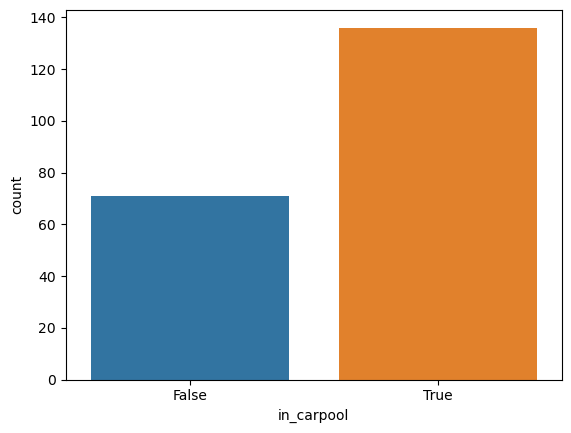

In [10]:
sbn.countplot(x='in_carpool',data=data_df)


In [11]:
data_df.corr()

C:\Users\navee\AppData\Local\Temp\ipykernel_5368\3493117147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df.corr()


,latitude,longitude,number_of_seats,in_carpool
latitude,1.000000,-0.852547,-0.522912,0.230607
longitude,-0.852547,1.000000,0.612497,-0.162148
number_of_seats,-0.522912,0.612497,1.000000,-0.222829
in_carpool,0.230607,-0.162148,-0.222829,1.000000


Less correlated variables are not selected for the process

In [12]:
data_df['in_carpool'] = data_df['in_carpool'].astype(int)
df = data_df.drop(['name','car_name','car_number','number_of_seats'], axis= 1)

<Figure size 1200x600 with 0 Axes>

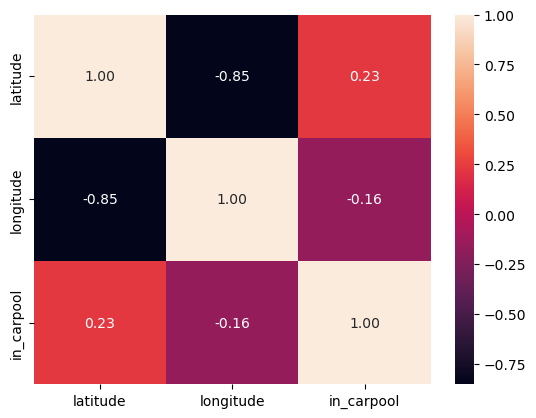

<Figure size 1200x600 with 0 Axes>

In [13]:
sbn.heatmap(df.corr(),fmt ='.2f', annot=True)
pp.figure(figsize=(12,6))

FINDING CORRELATION TO EACH VARIABLE

<Figure size 1200x600 with 0 Axes>

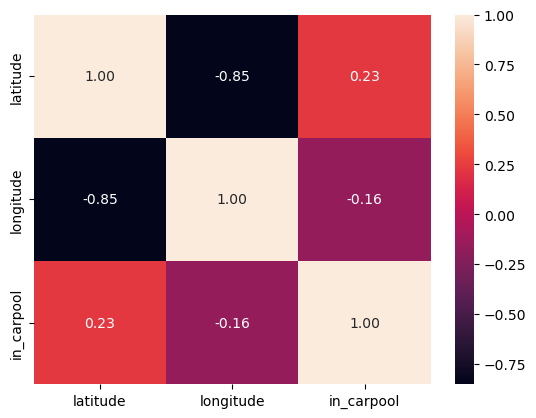

<Figure size 1200x600 with 0 Axes>

In [14]:
sbn.heatmap(df.corr(),fmt ='.2f', annot=True)
pp.figure(figsize=(12,6))

we can clearly see latitude,longitude and number of seats are highly correralted to in_carpool but number_of_seats is not measure selected for the prediction as it is completely based on the location. So we will consider other two variables latitude and longitude.

Creating a function for Box Plot to check the outliers.

Text(0.5, 1.0, 'Box and Whisker Diagram')

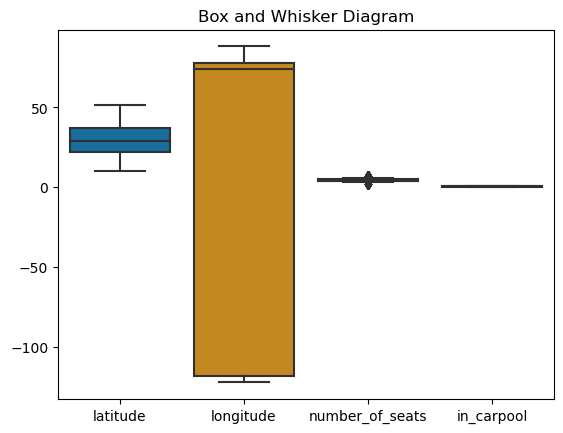

In [15]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    pp.grid(False)
    pp.show()

fig, ax = pp.subplots()
ax = sbn.boxplot(data_df, palette= 'colorblind')
ax.set_title('Box and Whisker Diagram')


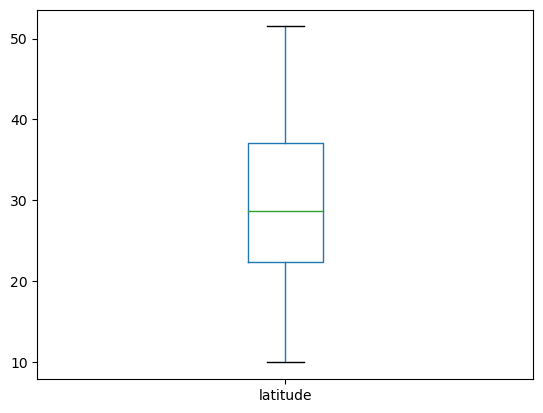

In [16]:
plot_boxplot(data_df,"latitude")

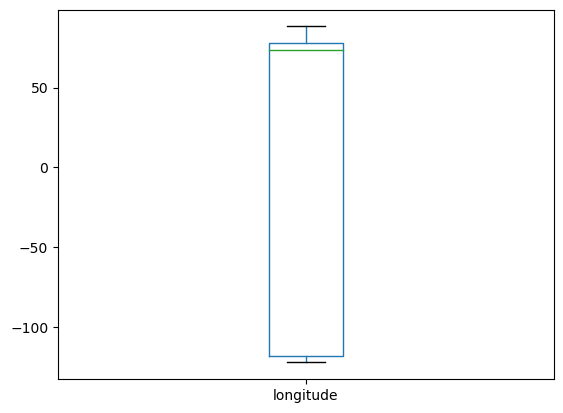

In [17]:
plot_boxplot(data_df,"longitude")

No Outliers for latitude and longitude.

USING KNeighborsClassifier BUILT-IN FUNCTION For PREDICTION AND FINDING THE ACCURACY.

The train-test-split is 80-20.

In [18]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Extract the features and target variable
X = data_df[['latitude', 'longitude']]
y = data_df['in_carpool']

max_accuracy = 0
best_model = None

for i in range(100):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create and train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    #print(accuracy)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_model = knn
        

print("Maximum Accuracy:", max_accuracy)
print("Best Model:", best_model)

Maximum Accuracy: 0.7380952380952381
Best Model: KNeighborsClassifier(n_neighbors=3)


USING LogisticRegression BUILT-IN FUNCTION For PREDICTION AND FINDING THE ACCURACY.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_model = None

for i in range(100):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create and train a logistic regression classifier
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_model = logreg

print("Maximum Accuracy:", max_accuracy)
print("Best Model:", best_model)

Maximum Accuracy: 0.8571428571428571
Best Model: LogisticRegression()


We can clearly see that after several training and testing the KNN model has better accuracy than the logistic regression.

Without using built-in function

In [20]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data_df = pd.read_csv('data.csv')

#missing_values = data_df.isna().sum()
#print(missing_values)
# Data cleaning process
data_df = data_df.dropna(subset=['in_carpool'])  # Drop rows with missing target values
data_df = data_df.drop_duplicates()
data_df =data_df.dropna(subset=['latitude'])
data_df =data_df.dropna(subset=['longitude'])

data_df
# Extract the features and target variable
X = data_df[['latitude', 'longitude']]
y = data_df['in_carpool']
names = data_df['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [21]:

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y, names):
        self.X_train = X
        self.y_train = y
        self.names_train = names

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        x = np.array(x).reshape(1, -1)
        distances = [euclidean_distance(x, np.array(x_train)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_names = [self.names_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0], k_nearest_names
'''
max_accuracy = 0
best_model = None

for i in range(100):
    X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, names, test_size=0.2)
    clf = KNN(k=3)
    clf.fit(X_train.values, y_train.values, names_train.values)
    predictions_and_neighbors = clf.predict(X_test.values)
    predictions = [x[0] for x in predictions_and_neighbors]
    nearest_neighbors = [x[1] for x in predictions_and_neighbors]
    accuracy = accuracy_score(y_test, predictions)
    print(accuracy)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_model = clf

print(f'Prediction: {predictions[0]}, Nearest Neighbors: {nearest_neighbors[1]}')
print("Maximum Accuracy:", max_accuracy)
print("Best Model:", best_model)

best_model_predictions_and_neighbors = best_model.predict(X_test.values)
best_model_predictions = [x[0] for x in best_model_predictions_and_neighbors]
best_model_nearest_neighbors = [x[1] for x in best_model_predictions_and_neighbors]

print("X_test.values for Best Model:")
for i in range(len(best_model_predictions)):
    print(f"Prediction: {best_model_predictions[i]}, Nearest Neighbors: {best_model_nearest_neighbors[i]}, X_test.values: {X_test.values[i]}")

'''

'\nmax_accuracy = 0\nbest_model = None\n\nfor i in range(100):\n    X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, names, test_size=0.2)\n    clf = KNN(k=3)\n    clf.fit(X_train.values, y_train.values, names_train.values)\n    predictions_and_neighbors = clf.predict(X_test.values)\n    predictions = [x[0] for x in predictions_and_neighbors]\n    nearest_neighbors = [x[1] for x in predictions_and_neighbors]\n    accuracy = accuracy_score(y_test, predictions)\n    print(accuracy)\n    if accuracy > max_accuracy:\n        max_accuracy = accuracy\n        best_model = clf\n\nprint(f\'Prediction: {predictions[0]}, Nearest Neighbors: {nearest_neighbors[1]}\')\nprint("Maximum Accuracy:", max_accuracy)\nprint("Best Model:", best_model)\n\nbest_model_predictions_and_neighbors = best_model.predict(X_test.values)\nbest_model_predictions = [x[0] for x in best_model_predictions_and_neighbors]\nbest_model_nearest_neighbors = [x[1] for x in best_model_predictions_a

After several training the KNN MODEL without using built-in function has an accuracy of 0.83 which is higher and better than the logistic regression.

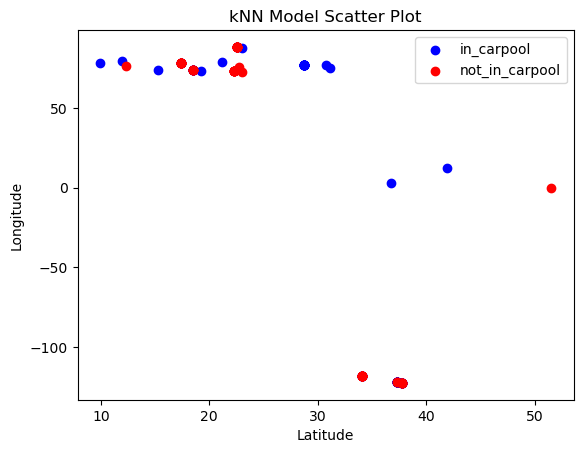

In [22]:
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train[y_train == True]['latitude'], X_train[y_train == True]['longitude'], color='blue', label='in_carpool')
plt.scatter(X_train[y_train == False]['latitude'], X_train[y_train == False]['longitude'], color='red', label='not_in_carpool')

# Plot the test data
#plt.scatter(X_test[y_test == True]['latitude'], X_test[y_test == True]['longitude'], color='lightblue', label='in_carpool (test)')
#plt.scatter(X_test[y_test == False]['latitude'], X_test[y_test == False]['longitude'], color='pink', label='not_in_carpool (test)')

# Set the axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('kNN Model Scatter Plot')

# Add a legend
plt.legend()

# Show the plot
plt.show()

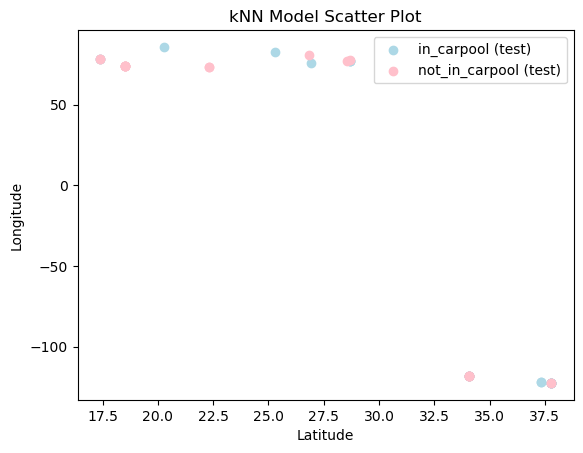

In [23]:
# Plot the test data
plt.scatter(X_test[y_test == True]['latitude'], X_test[y_test == True]['longitude'], color='lightblue', label='in_carpool (test)')
plt.scatter(X_test[y_test == False]['latitude'], X_test[y_test == False]['longitude'], color='pink', label='not_in_carpool (test)')

# Set the axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('kNN Model Scatter Plot')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [27]:
import pickle
with open("Final_pred.pickle","wb") as p:
            pickle.dump(best_model,p)

In [28]:
import gradio as gr
import pickle
pickle_in = open("Final_pred.pickle","rb")
best_model = pickle.load(pickle_in)


In [29]:

def predict_carpool_zone(latitude, longitude):
    prediction,neighbours = best_model.predict([[latitude, longitude]])[0]
    prediction_str = 'In carpool' if prediction[True] else 'not in carpool'
    return prediction_str, str(neighbours)

iface = gr.Interface(
    fn=predict_carpool_zone,
    inputs=['number', 'number'],
    outputs=['label','label']
)

iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


c:\Users\navee\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\routes.py", line 437, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\blocks.py", line 1352, in process_api
    result = await self.call_function(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\blocks.py", line 1077, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\anyio\_backends\_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  Fil